In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityafah","key":"c74b75e7b57e7c316966bfb779302756"}'}

In [2]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dharminshah/dogbreed
! kaggle datasets download -d crawford/cat-dataset
! mkdir dataset
! mkdir dataset/dog/
! mkdir dataset/cat/
! unzip dogbreed.zip -d dataset/dog
! unzip cat-dataset.zip -d dataset/cat
! rm -rf dataset/cat/cats

Streaming output truncated to the last 5000 lines.
  inflating: dataset/cat/cats/CAT_05/00001130_020.jpg  
  inflating: dataset/cat/cats/CAT_05/00001130_020.jpg.cat  
  inflating: dataset/cat/cats/CAT_05/00001130_023.jpg  
  inflating: dataset/cat/cats/CAT_05/00001130_023.jpg.cat  
  inflating: dataset/cat/cats/CAT_05/00001130_026.jpg  
  inflating: dataset/cat/cats/CAT_05/00001130_026.jpg.cat  
  inflating: dataset/cat/cats/CAT_05/00001131_003.jpg  
  inflating: dataset/cat/cats/CAT_05/00001131_003.jpg.cat  
  inflating: dataset/cat/cats/CAT_05/00001131_026.jpg  
  inflating: dataset/cat/cats/CAT_05/00001131_026.jpg.cat  
  inflating: dataset/cat/cats/CAT_05/00001132_007.jpg  
  inflating: dataset/cat/cats/CAT_05/00001132_007.jpg.cat  
  inflating: dataset/cat/cats/CAT_05/00001132_008.jpg  
  inflating: dataset/cat/cats/CAT_05/00001132_008.jpg.cat  
  inflating: dataset/cat/cats/CAT_05/00001132_014.jpg  
  inflating: dataset/cat/cats/CAT_05/00001132_014.jpg.cat  
  inflating: dataset/

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from PIL import Image, ImageFile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [4]:
# Menyatukan gambar kucing ke dalam satu folder
for root, dirs, files in os.walk('dataset/cat'):
  for name in files:
    if name.endswith('.jpg'):
      os.rename(os.path.join(root, name), 'dataset/cat/'+name)
    else:
      os.remove(os.path.join(root, name))

In [5]:
# Menghapus subfolder kosong di folder dataset kucing
for root, dirs, files in os.walk('dataset/cat'):
  for folder in dirs:
    shutil.rmtree(os.path.join(root, folder))

In [6]:
# Menyatukan gambar anjing ke dalam satu folder
i = 0
for root, dirs, files in os.walk('dataset/dog'):
  for name in files:
    if name.endswith('.jpg'):
      os.rename(os.path.join(root, name), 'dataset/dog/{}.jpg'.format(i))
      i+=1
    else:
      os.remove(os.path.join(root, name))

In [7]:
# Menghapus subfolder kosong di folder dataset anjing
for root, dirs, files in os.walk('dataset/dog'):
  for folder in dirs:
    shutil.rmtree(os.path.join(root, folder))

In [8]:
# Mengubah semua nama file dataset
filepath = 'dataset/cat'
for i, files in enumerate(os.listdir(filepath)):
  os.rename(os.path.join(filepath, files), 'dataset/cat/cat_{}.jpg'.format(i))

filepath = 'dataset/dog'
for i, files in enumerate(os.listdir(filepath)):
  os.rename(os.path.join(filepath, files), 'dataset/dog/dog_{}.jpg'.format(i))

In [9]:
# ! rm -rf dataset/cat
# ! rm -rf dataset/dog
# ! unzip 70-dog-breedsimage-data-set.zip -d dataset/dog
# ! unzip cat-dataset.zip -d dataset/cat
# ! kaggle datasets download -d dharminshah/dogbreed
# ! mkdir dataset/dog1
# ! unzip dogbreed.zip -d dataset/dog1

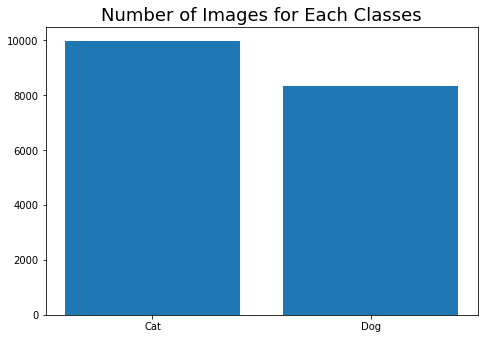

Number of cat images: 9993
Number of dog images: 8351


In [10]:
num_of_cat_images = len(os.listdir('dataset/cat'))
num_of_dog_images = len(os.listdir('dataset/dog'))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Cat', 'Dog']
y = [num_of_cat_images, num_of_dog_images]
ax.set_title('Number of Images for Each Classes', fontsize=18)
ax.bar(x, y)
plt.show()

print('Number of cat images:', str(num_of_cat_images))
print('Number of dog images:', str(num_of_dog_images))

In [11]:
# Untuk menyeimbangkan jumlah dataset per kelas,
# hanya 8351 gambar kucing yang dipakai
dir = 'dataset/cat'
for i, file in enumerate(os.listdir(dir)):
  if not i < 8351:
    os.remove(os.path.join(dir, file))

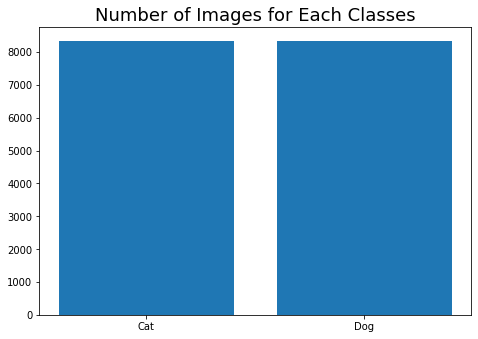

Number of cat images: 8351
Number of dog images: 8351


In [12]:
num_of_cat_images = len(os.listdir('dataset/cat'))
num_of_dog_images = len(os.listdir('dataset/dog'))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Cat', 'Dog']
y = [num_of_cat_images, num_of_dog_images]
ax.set_title('Number of Images for Each Classes', fontsize=18)
ax.bar(x, y)
plt.show()

print('Number of cat images:', str(num_of_cat_images))
print('Number of dog images:', str(num_of_dog_images))

In [13]:
# Dataset gambar kucing memiliki resolusi yang bervariasi
dir = 'dataset/cat'
resolutions = []
for file in os.listdir(dir):
  with Image.open(os.path.join(dir, file)) as img:
    width, height = img.size
  resolutions.append([width, height])
print('Minimum resolution: {}'.format(min(resolutions)))
print('Maximum resolution: {}'.format(max(resolutions)))

Minimum resolution: [135, 101]
Maximum resolution: [1024, 1024]


In [14]:
# Dataset gambar anjing juga memiliki resolusi yang bervariasi
dir = 'dataset/dog'
resolutions = []
for file in os.listdir(dir):
  with Image.open(os.path.join(dir, file)) as img:
    width, height = img.size
  resolutions.append([width, height])
print('Minimum resolution: {}'.format(min(resolutions)))
print('Maximum resolution: {}'.format(max(resolutions)))

Minimum resolution: [105, 120]
Maximum resolution: [4278, 3744]


In [15]:
# Membuat folder subset data latih dan uji
train_dir = 'dataset/train'
test_dir = 'dataset/test'
if not os.path.exists(train_dir) and not os.path.exists(test_dir):
    os.mkdir(train_dir)
    os.mkdir(test_dir)

In [16]:
# Membagi dataset kucing menjadi train set dan test set
dir = 'dataset/cat'
train_dir = 'dataset/train/cat'
test_dir = 'dataset/test/cat'
if not os.path.exists(train_dir) and not os.path.exists(test_dir):
    os.mkdir(train_dir)
    os.mkdir(test_dir)

split = round(0.8*len(os.listdir(dir)))
for i, file in enumerate(os.listdir(dir)):
  if i < split:
    os.rename(os.path.join(dir, file), 'dataset/train/cat/'+file)
  else:
    os.rename(os.path.join(dir, file), 'dataset/test/cat/'+file)

os.rmdir(dir)

In [17]:
# Membagi dataset anjing menjadi train set dan test set
dir = 'dataset/dog'
train_dir = 'dataset/train/dog'
test_dir = 'dataset/test/dog'
if not os.path.exists(train_dir) and not os.path.exists(test_dir):
    os.mkdir(train_dir)
    os.mkdir(test_dir)

split = round(0.8*len(os.listdir(dir)))
for i, file in enumerate(os.listdir(dir)):
  if i < split:
    os.rename(os.path.join(dir, file), 'dataset/train/dog/'+file)
  else:
    os.rename(os.path.join(dir, file), 'dataset/test/dog/'+file)

os.rmdir(dir)

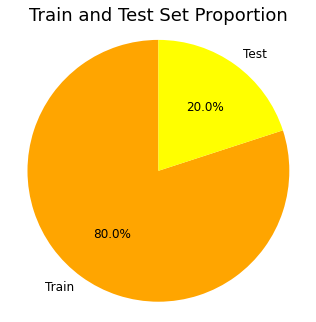

Number of cat images
Train: 6681	Test: 1670

Number of dog images
Train: 6681	Test: 1670


In [18]:
num_train = len(os.listdir('dataset/train/cat')) + len(os.listdir('dataset/train/dog'))
num_test = len(os.listdir('dataset/test/cat')) + len(os.listdir('dataset/test/dog'))

fig = plt.figure()
x = ['Train', 'Test']
y = [num_train, num_test]
plt.title('Train and Test Set Proportion', fontsize=18)
colors=['orange', 'yellow']
plt.pie(y,labels=x, colors=colors, startangle=90, autopct='%1.1f%%', radius=1.5, textprops={'fontsize': 12})
fig.subplots_adjust(0.3,0,1,1)
plt.axis('equal')
plt.show()

print('Number of cat images\nTrain: {}\tTest: {}'.format(len(os.listdir('dataset/train/cat')), len(os.listdir('dataset/test/cat'))))
print('\nNumber of dog images\nTrain: {}\tTest: {}'.format(len(os.listdir('dataset/train/dog')), len(os.listdir('dataset/test/dog'))))

In [19]:
root_dir = 'dataset/'
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

Found 13362 images belonging to 2 classes.
Found 3340 images belonging to 2 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('acc') > 0.93) and (logs.get('val_acc') > 0.93):
            print("\nDesired accuracy (93%) reached.")
            self.model.stop_training = True
callbacks = myCallback()

In [23]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=1000,
    callbacks=[callbacks],
    verbose=2 
)

Epoch 1/1000
418/418 - 218s - loss: 0.6917 - acc: 0.5311 - val_loss: 0.6810 - val_acc: 0.5877
Epoch 2/1000
418/418 - 170s - loss: 0.6498 - acc: 0.6204 - val_loss: 0.6392 - val_acc: 0.6356
Epoch 3/1000
418/418 - 167s - loss: 0.6121 - acc: 0.6640 - val_loss: 0.5830 - val_acc: 0.6874
Epoch 4/1000
418/418 - 168s - loss: 0.5871 - acc: 0.6929 - val_loss: 0.5500 - val_acc: 0.7174
Epoch 5/1000
418/418 - 165s - loss: 0.5666 - acc: 0.7111 - val_loss: 0.5300 - val_acc: 0.7353
Epoch 6/1000
418/418 - 166s - loss: 0.5373 - acc: 0.7291 - val_loss: 0.5757 - val_acc: 0.7024
Epoch 7/1000
418/418 - 166s - loss: 0.5104 - acc: 0.7489 - val_loss: 0.4524 - val_acc: 0.7859
Epoch 8/1000
418/418 - 167s - loss: 0.4850 - acc: 0.7640 - val_loss: 0.4253 - val_acc: 0.8072
Epoch 9/1000
418/418 - 168s - loss: 0.4672 - acc: 0.7744 - val_loss: 0.4841 - val_acc: 0.7671
Epoch 10/1000
418/418 - 165s - loss: 0.4504 - acc: 0.7840 - val_loss: 0.4170 - val_acc: 0.8072
Epoch 11/1000
418/418 - 170s - loss: 0.4282 - acc: 0.7976 -

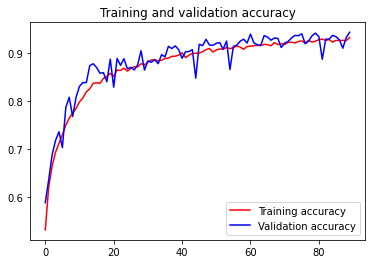

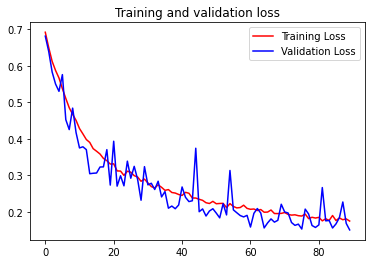

In [24]:
# Membuat plot loss dan akurasi pada proses latihan dan validasi
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpw2f9tce8/assets
